In [8]:
import os
import sys
import numpy as np
import pandas as pd
from statistics import mean 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import com_func

Dataset = "pubmed"
result_path = "../../result/"+Dataset+"/2_OCEN_Different_train_percentage_sample=140k/"
filter_size = 100
fig_save_path = "../../plot/2_OCEN/filter="+str(filter_size)+"/"

# Phase zero: Load and process data

In [9]:
# --------------- load result --------------- #
import collections
pp_text_emb = ["tf", "tf_idf", "lsa", "pv_dm", "pv_dbow"]
pp_citation_emb = ["off","n2v"]
diff_percent_result = collections.defaultdict(list)
prevent_repeat_load = []
for text_emb in pp_text_emb:
    for citation_emb in pp_citation_emb:
        curr_embedding_result = collections.defaultdict(list)
        if text_emb is "off" and citation_emb is "off":
            break
        if text_emb is "tf" or text_emb is "tf_idf":
            citation_emb="off"
        result_filename = "citation="+citation_emb+"_textual="+text_emb+"_threshold="+str(filter_size)+".csv"
        if result_filename in prevent_repeat_load:
            break
        print(text_emb+" "+citation_emb)
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        prevent_repeat_load.append(result_filename)
        # save all percent result in array
        curr_embedding_result["used_train_percent"]=result["used_train_percent"].values
        curr_embedding_result["Name group"]=result["Name group"].values
        if text_emb is "tf":
            curr_embedding_result["MNB macro F1"]=result["MNB macro F1"].values
        curr_embedding_result["LR macro f1"]=result["LR macro f1"].values
        curr_embedding_result["SVM macro f1"]=result["SVM(linear) macro f1"].values
        
        diff_percent_result[text_emb+" "+citation_emb]=curr_embedding_result
        
#print(diff_percent_result)        

tf off
tf_idf off
lsa off
lsa n2v
pv_dm off
pv_dm n2v
pv_dbow off
pv_dbow n2v


In [10]:
def list_duplicates(seq):
    tally = collections.defaultdict(list)
    for i,item in enumerate(seq):
        tally[item].append(i)
    return ((key,locs) for key,locs in tally.items() if len(locs)>1)

In [11]:
from statistics import mean 
# -------------- extract different training size mean f1 score and case when train percentage=1  ------------ #
author_group = []
diff_embedding_mean_result = collections.defaultdict(list)
diff_embedding_all_train_result = collections.defaultdict(list)
for emb_setting, emb_result in diff_percent_result.items():
    print(emb_setting)
    used_train_percent = []
    curr_embedding_mean_result = collections.defaultdict(list)
    curr_embedding_all_train_result = collections.defaultdict(list)
    for key, key_result in emb_result.items():
        # extract train percentage and result index
        if key == "used_train_percent":
            used_train_percent = list(list_duplicates(key_result))
        # extract unqiue author groups
        if key == "Name group":
            author_group = [v for (i,v) in enumerate(key_result) if v not in key_result[0:i]]
        # use index we get to extract result and save it
        for att_key in ["MNB macro F1","LR macro f1","SVM macro f1"]:
            if key == att_key:
                temp = []
                for percentage, idx in used_train_percent:
                    # mean w.r.t different dataset
                    curr_embedding_mean_result[att_key].append(mean(key_result[idx]))
                    # extract result of all datasets for percentage = 1
                    if percentage == 1:
                        curr_embedding_all_train_result[att_key]=key_result[idx]
                    temp.append(percentage)
                curr_embedding_mean_result["train_percent"] = temp
    diff_embedding_mean_result[emb_setting]=curr_embedding_mean_result
    diff_embedding_all_train_result[emb_setting]=curr_embedding_all_train_result
#print(diff_embedding_mean_result)
print(diff_embedding_all_train_result)

tf off
tf_idf off
lsa off
lsa n2v
pv_dm off
pv_dm n2v
pv_dbow off
pv_dbow n2v
defaultdict(<class 'list'>, {'tf off': defaultdict(<class 'list'>, {'MNB macro F1': array([0.97526845, 0.95223352, 0.98845039, 0.97397468, 0.97477388,
       0.97594764, 0.87162783, 0.99221267, 0.97132333, 0.99721963,
       0.7611643 , 0.96983064, 0.94372797, 0.77844869, 0.90966914,
       0.55785527, 0.90498169, 0.96502883]), 'LR macro f1': array([0.95567167, 0.94822927, 0.98845039, 0.97921942, 0.97058772,
       0.99036234, 0.95176804, 0.98439369, 0.96492511, 0.99721963,
       0.9427055 , 0.94910226, 0.96106712, 0.9924359 , 0.9682924 ,
       0.94312362, 0.98598101, 0.98573563]), 'SVM macro f1': array([0.97307905, 0.96812547, 1.        , 0.99741858, 0.97058772,
       0.99036234, 0.98173516, 0.98442535, 0.97450574, 0.99721963,
       0.9802722 , 0.96298017, 0.97809264, 0.99624496, 0.98823932,
       0.98863805, 0.99068726, 0.98792677])}), 'tf_idf off': defaultdict(<class 'list'>, {'LR macro f1': array([0.

# Plot 1: Influence of different training size

In [12]:
clf_methods = ["LR","SVM"]
embedding_methods = ["TF","TF-IDF","LSA", "LSA&n2v","PV-DM","PV-DM&n2v","PV-DBOW","PV-DBOW&n2v"]

In [ ]:
#-------------- reformate result -------------- #
all_mean_result_clfwise = []
LR_result = []
SVM_result = []
train_percentage = []
for emb_setting, emb_result in diff_embedding_mean_result.items():
    print(emb_setting)
    for key, key_result in emb_result.items():
        if key == "LR macro f1":
            LR_result.append(key_result)
        if key == "SVM macro f1":
            SVM_result.append(key_result)
        if key == "train_percent":
            train_percentage = ['%.1f' % elem for elem in key_result]
    #print(LR_result)
    #print(SVM_result)
print(train_percentage)
all_mean_result_clfwise.append(LR_result)
all_mean_result_clfwise.append(SVM_result)

In [ ]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (10, 6)

for idx, (result,method) in enumerate(zip(all_mean_result_clfwise,clf_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(train_percentage)), xticklabels=train_percentage)
    print(method)
    print(embedding_methods)
    for emb,emb_label in zip(result, embedding_methods):
        print(np.mean(emb))
        axs.plot(emb, marker='o',label=emb_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        plt.savefig(fname=fig_save_path+"OCEN_diff_train_percent_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"OCEN_diff_train_percent_filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

# Plot 2: All dataset result w.r.t. different embedding on MNB, LR and SVM

In [13]:
diff_embedding_all_train_result

defaultdict(list,
            {'lsa n2v': defaultdict(list,
                         {'LR macro f1': array([0.95646765, 0.95213675, 0.99616869, 0.96426006, 0.94537719,
                                 0.96621418, 0.98911842, 0.94873461, 0.94891194, 0.9805434 ,
                                 0.95854064, 0.96641253, 0.95149166, 0.97741656, 0.96148459,
                                 0.96699507, 0.98607809, 0.95221923]),
                          'SVM macro f1': array([0.94600584, 0.95604396, 0.98853175, 0.97440317, 0.94537719,
                                 0.96621418, 0.98186403, 0.94471678, 0.94252593, 0.9666502 ,
                                 0.95448382, 0.96654351, 0.94907611, 0.96988874, 0.96162219,
                                 0.95599343, 0.98143745, 0.94680988])}),
             'lsa off': defaultdict(list,
                         {'LR macro f1': array([0.92527989, 0.94020407, 0.9768095 , 0.97397468, 0.96218421,
                                 0.97591645, 0.90066468, 

In [14]:
#-------------- reformate result -------------- #
all_result_clfwise = []
MNB_result = []
LR_result = []
SVM_result = []
for emb_setting, emb_result in diff_embedding_all_train_result.items():
    print(emb_setting)
    for key, key_result in emb_result.items():
        if key == "LR macro f1":
            LR_result.append(key_result)
        if key == "SVM macro f1":
            SVM_result.append(key_result)
        if key == "MNB macro F1":
            MNB_result.append(key_result)
    #print(LR_result)
    #print(SVM_result)
all_result_clfwise.append(LR_result)
all_result_clfwise.append(SVM_result)
print(all_result_clfwise)

tf off
tf_idf off
lsa off
lsa n2v
pv_dm off
pv_dm n2v
pv_dbow off
pv_dbow n2v
[[array([0.95567167, 0.94822927, 0.98845039, 0.97921942, 0.97058772,
       0.99036234, 0.95176804, 0.98439369, 0.96492511, 0.99721963,
       0.9427055 , 0.94910226, 0.96106712, 0.9924359 , 0.9682924 ,
       0.94312362, 0.98598101, 0.98573563]), array([0.97248974, 0.96812547, 0.99230991, 0.97134423, 0.97899123,
       0.98553647, 0.90875   , 0.98830732, 0.9553252 , 0.99721963,
       0.92068941, 0.94559413, 0.97080034, 0.9924359 , 0.97231849,
       0.91669689, 0.97650177, 0.99035597]), array([0.92527989, 0.94020407, 0.9768095 , 0.97397468, 0.96218421,
       0.97591645, 0.90066468, 0.98439369, 0.93282054, 0.97220077,
       0.90406687, 0.90214408, 0.92911718, 0.97707966, 0.87847619,
       0.90283893, 0.97201258, 0.97341087]), array([0.95646765, 0.95213675, 0.99616869, 0.96426006, 0.94537719,
       0.96621418, 0.98911842, 0.94873461, 0.94891194, 0.9805434 ,
       0.95854064, 0.96641253, 0.95149166, 0.977

LR
['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.9699594844195466
0.9668773389709318
0.9435330454783348
0.9649206247602058
0.9629886039191324
0.9818954755738187
0.9859302940605461
0.9901649562984763
test


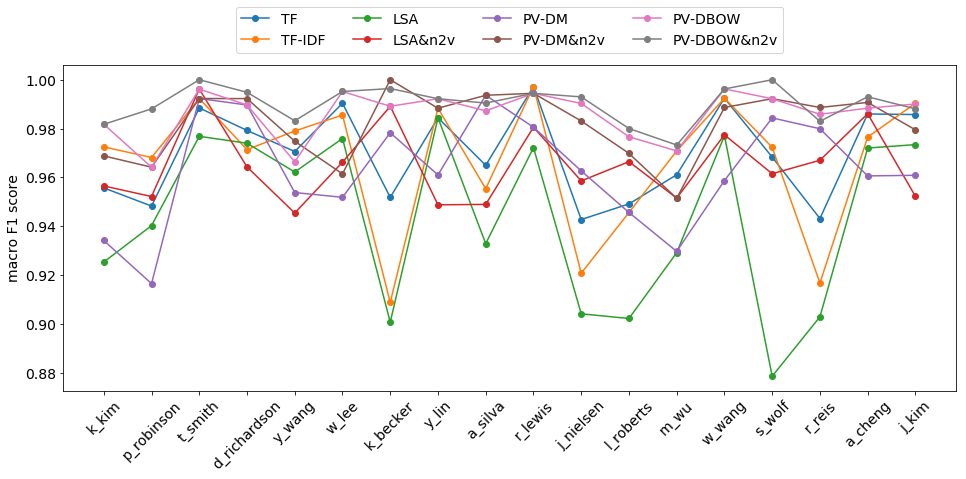

SVM
['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.9839189115574197
0.9844495025901148
0.9666659195715879
0.9610104533372703
0.9375844513524956
0.970384930558159
0.9785308259772219
0.9847265712560866
test


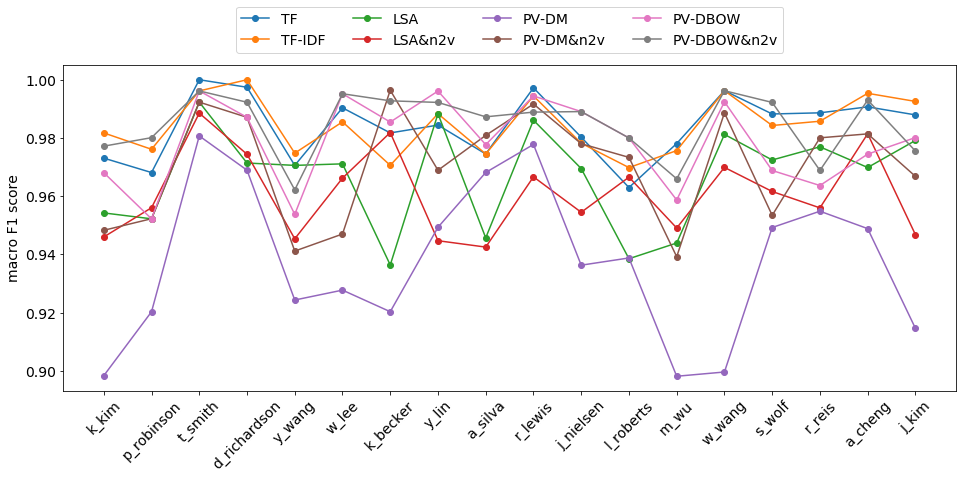

In [15]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (16, 6)

for idx, (result,method) in enumerate(zip(all_result_clfwise,clf_methods)):
    print(method)
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(embedding_methods)
    for emb,emb_label in zip(result, embedding_methods):
        print(np.mean(emb))
        axs.plot(emb, marker='o',label=emb_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        print("test")
        #|plt.savefig(fname=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=150,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=150,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

# Plot 3: All dataset result w.r.t. different algorithm on different vector type

In [ ]:
#--------- reformate ------------- #
all_result_embeddingwise=list(zip(*all_result_clfwise))
#print(all_result_embeddingwise)

In [ ]:
import math
import matplotlib.pyplot as plt

figsize = (16, 6)

for idx, (result,method) in enumerate(zip(all_result_embeddingwise,embedding_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(method)
    # add naive bayes result
    if method is "TF":
        result = result+tuple(MNB_result)
        clf_methods.append("NB")
    for clf_result,clf_label in zip(result, clf_methods):
        print(clf_label)
        print(np.mean(clf_result))
        axs.plot(clf_result, marker='o',label=clf_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        plt.savefig(fname=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=150,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(fname=fig_save_path+"OCEN_filter="+str(filter_size)+"_"+method+".png",dpi=150,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()
    if method is "TF":
        clf_methods.remove("NB")